<a href="https://colab.research.google.com/github/Pagido/projet/blob/main/Copie_de_AFC_%C3%A9volution_des_professions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L'évolution professionelle des révolutionnaires entre 1789 et 1830

In [ ]:
! pip install mca

In [ ]:
import pandas as pd
import os #module pour connaitre et modifier le répertoire courant où Python cherche les modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install fanalysis
from fanalysis.ca import CA as fCA
from fanalysis.mca import MCA as fMCA
from mca import MCA
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/Data/rev17892.xlsx"

data = pd.read_excel("/content/drive/My Drive/Data/rev17892.xlsx", index_col = 0)
data.head()

MessageError: Error: credential propagation was unsuccessful

In [ ]:
data['Profession (1789)'].value_counts()

Profession (1789)
garde française             329
Personnels des armées        52
garde nationale              43
volontaire de la Bazoche     24
Name: count, dtype: int64

In [ ]:
data['Profession (1830)'].value_counts()

Profession (1830)
Personnels des armées                      112
artisan                                     81
employé                                     26
professions intellectuelles supérieures     25
ouvrier                                     23
fonctionnaire                               20
métiers agricoles                           18
Entrepreneurs commerciaux                   13
Name: count, dtype: int64

In [ ]:
data.shape

(3780, 20)

Tableau de contingence:
                              Entrepreneurs commerciaux  \
Personnels des armées (1789)                          0   
garde française                                       5   
garde nationale                                       2   
volontaire de la Bazoche                              1   

                              Personnels des armées  artisans  employés  \
Personnels des armées (1789)                      4         5         5   
garde française                                  52        24        10   
garde nationale                                   4        11         1   
volontaire de la Bazoche                          2         0         0   

                              fonctionnaires  métiers agricoles  ouvriers  
Personnels des armées (1789)               3                  6         1  
garde française                           11                 11        12  
garde nationale                            3                  1         1  


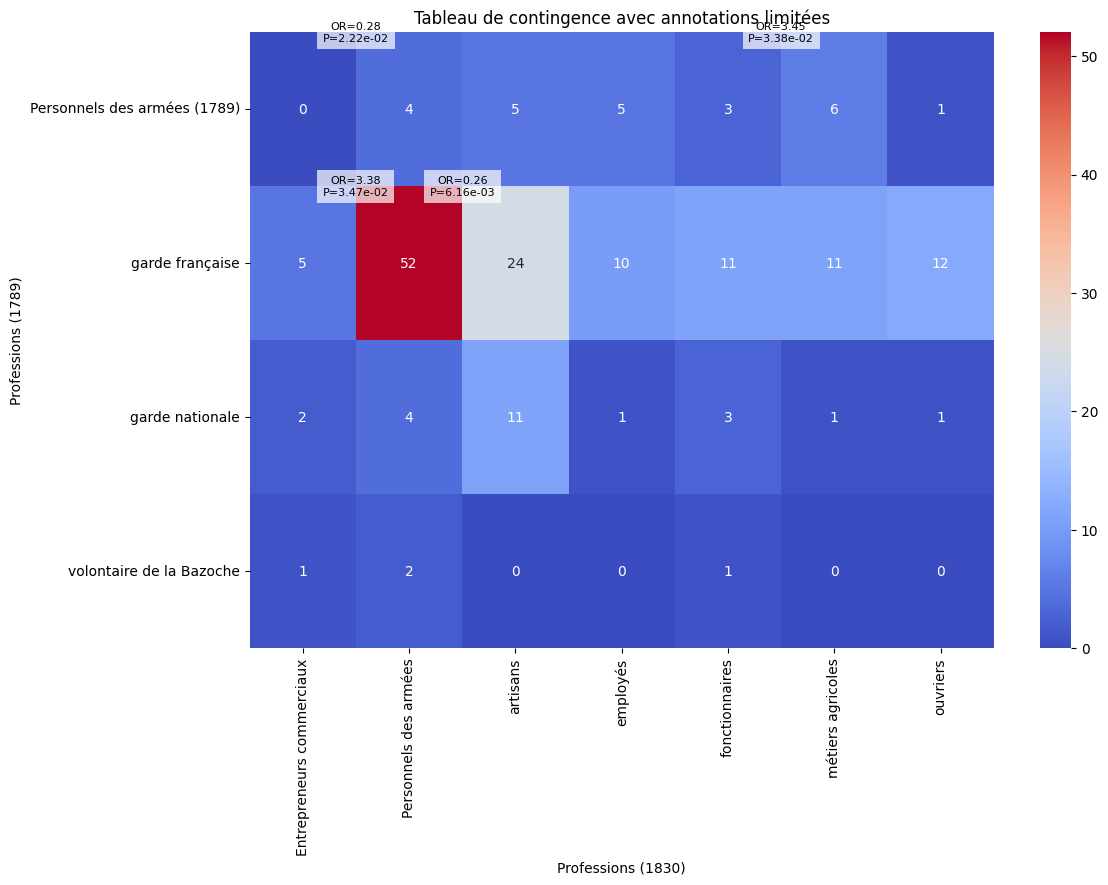

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le tableau de contingence à partir des données de la capture d'écran
data = np.array([
    [0, 4, 5, 5, 3, 6, 1],  # Personnels des armées (1789)
    [5, 52, 24, 10, 11, 11, 12],  # garde française
    [2, 4, 11, 1, 3, 1, 1],  # garde nationale
    [1, 2, 0, 0, 1, 0, 0]   # volontaire de la Bazoche
])

# Conversion en DataFrame pour une meilleure visualisation
df = pd.DataFrame(data, columns=['Entrepreneurs commerciaux', 'Personnels des armées', 'artisans', 'employés', 'fonctionnaires', 'métiers agricoles', 'ouvriers'],
                  index=['Personnels des armées (1789)', 'garde française', 'garde nationale', 'volontaire de la Bazoche'])
print("Tableau de contingence:")
print(df)

# Fonction pour effectuer le test de Fisher pour chaque paire de professions et chaque modalité
def fisher_tests_for_all_pairs(dataframe):
    results = []
    professions = dataframe.index
    modalities = dataframe.columns

    for i, prof1 in enumerate(professions):
        for prof2 in professions[i+1:]:
            for modality in modalities:
                data_to_compare = np.array([
                    [dataframe.loc[prof1, modality], dataframe.loc[prof1, :].sum() - dataframe.loc[prof1, modality]],
                    [dataframe.loc[prof2, modality], dataframe.loc[prof2, :].sum() - dataframe.loc[prof2, modality]]
                ])
                oddsratio, p_value = stats.fisher_exact(data_to_compare)
                results.append({
                    'Profession 1': prof1,
                    'Profession 2': prof2,
                    'Modalité': modality,
                    'Odds Ratio': oddsratio,
                    'P-value': p_value
                })
    return pd.DataFrame(results)

# Exécuter les tests de Fisher pour toutes les paires de professions et toutes les modalités
all_results = fisher_tests_for_all_pairs(df)

# Affichage des résultats sous forme de tableau
print("\nRésultats des tests de Fisher pour chaque paire de professions et chaque modalité:")
print(all_results)

# Exporter les résultats dans un fichier CSV pour une meilleure lisibilité
all_results.to_csv('fisher_test_results.csv', index=False)

# Fonction pour filtrer les résultats significatifs
def filter_significant_results(results, alpha=0.05):
    return results[results['P-value'] < alpha]

# Filtrer les résultats significatifs
significant_results = filter_significant_results(all_results)

# Affichage des résultats significatifs
print("\nRésultats significatifs des tests de Fisher (p-value < 0.05):")
print(significant_results)

# Résumé statistique des résultats
def summary_statistics(results):
    summary = results.groupby('Modalité').agg(
        total_comparisons=('P-value', 'count'),
        significant_comparisons=('P-value', lambda x: (x < 0.05).sum())
    )
    summary['proportion_significant'] = summary['significant_comparisons'] / summary['total_comparisons']
    return summary

# Générer le résumé statistique
summary = summary_statistics(all_results)
print("\nRésumé statistique des résultats:")
print(summary)

# Exporter le résumé dans un fichier CSV
summary.to_csv('fisher_test_summary.csv')

# Visualisation des résultats significatifs
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Tableau de contingence avec annotations limitées")
plt.xlabel("Professions (1830)")
plt.ylabel("Professions (1789)")

# Ajouter des annotations uniquement pour les résultats significatifs
for index, row in significant_results.iterrows():
    prof1 = row['Profession 1']
    modality = row['Modalité']
    oddsratio = row['Odds Ratio']
    p_value = row['P-value']
    plt.text(df.columns.get_loc(modality), df.index.get_loc(prof1), f'OR={oddsratio:.2f}\nP={p_value:.2e}',
             ha='center', va='center', color='black', fontsize=8, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()

# Générer un rapport détaillé avec tous les résultats
with open('fisher_test_report.txt', 'w') as f:
    f.write("Résultats des tests de Fisher pour chaque paire de professions et chaque modalité:\n")
    f.write(all_results.to_string())
    f.write("\n\nRésumé statistique des résultats:\n")
    f.write(summary.to_string())

In [ ]:
data.columns

Index(['Année', 'Nom', 'Prénoms', 'Sexe', 'Etat civil', 'Date de naissance',
       'Date de naissance (normalisé)', 'Lieu de naissance',
       'Nature de la demande', 'Profession', 'Domicile (adresse)',
       'Domicile (commune)', 'Lieu des faits', 'Nature des faits',
       'Nature des faits (normalisé)', 'Date de mort',
       'Date de mort normalisée', 'Décision de la Commission',
       'Date de la décision', 'Remarques'],
      dtype='object')

In [ ]:
#df.dtypes
data.describe()

NameError: name 'data' is not defined

In [ ]:
contingence = pd.crosstab(data['Profession (1789)'], data['Profession (1830)'],  margins = True)
contingence

Profession (1830),Entrepreneurs commerciaux,Personnels des armées,artisan,employé,fonctionnaire,métiers agricoles,ouvrier,professions intellectuelles supérieures,All
Profession (1789),,,,,,,,,
Personnels des armées,0,4,5,5,3,6,1,1,25
garde française,5,52,24,10,11,11,12,11,136
garde nationale,2,4,11,1,3,1,1,1,24
volontaire de la Bazoche,1,2,0,0,1,0,0,8,12
All,8,62,40,16,18,18,14,21,197


In [ ]:
data.Dormi_8dernierjrs[data.Dormi_8dernierjrs=='Plusieurs_lieux']='Plusieurs lieux'
contingence = pd.crosstab(data['A'], df['Dormi_8dernierjrs'], margins = True)
contingence

Dormi_8dernierjrs,Non réponse,Plusieurs lieux,Un seul lieu,All
Age,,,,
- de 30 ans,8,79,118,205
30 à 39 ans,6,57,103,166
40 à 49 ans,6,41,67,114
50 ans et +,3,26,55,84
Non réponse,5,12,16,33
All,28,215,359,602


In [ ]:
contingence = pd.crosstab(data['Profession (1789)'], data['Profession (1830)'], margins = False)
#attention si on ne précise pas margins=False, Python compte les marges dans le calcul du ddl
stats.chi2_contingency(contingence) #Test d'indépendance du Khi² dans la librairie scipy

#Khi2obs, pvalue, ddl, effectifs_theorique =stats.chi2_contingency(contingence)

Chi2ContingencyResult(statistic=74.40067414196861, pvalue=6.809566177949473e-08, dof=21, expected_freq=array([[ 1.01522843,  7.8680203 ,  5.07614213,  2.03045685,  2.28426396,
         2.28426396,  1.77664975,  2.66497462],
       [ 5.52284264, 42.80203046, 27.6142132 , 11.04568528, 12.42639594,
        12.42639594,  9.66497462, 14.49746193],
       [ 0.97461929,  7.55329949,  4.87309645,  1.94923858,  2.1928934 ,
         2.1928934 ,  1.70558376,  2.55837563],
       [ 0.48730964,  3.77664975,  2.43654822,  0.97461929,  1.0964467 ,
         1.0964467 ,  0.85279188,  1.27918782]]))

La 1re valeur est le Khi² obs, la 2e la probabilité critique, la 3e le degré de liberte et dans le tableau les effectifs théoriques

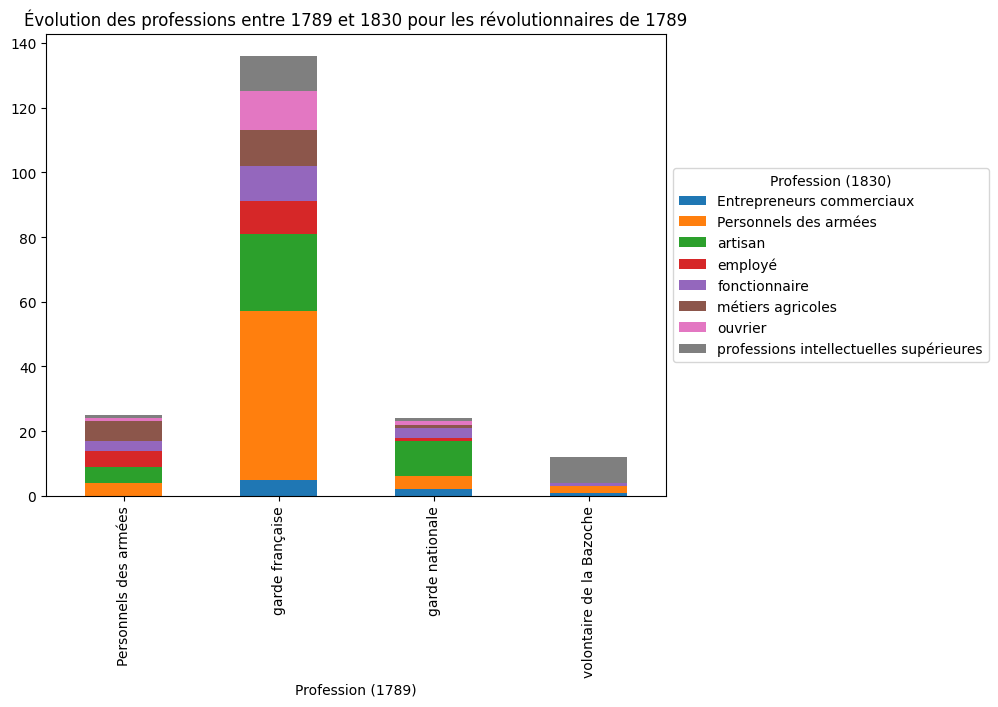

In [ ]:
# Calculer la table de contingence
contingence = pd.crosstab(data['Profession (1789)'], data['Profession (1830)'], margins=False)

# Tracer le graphique à barres empilées
ax = contingence.plot.bar(stacked=True, figsize=(8, 6), title="Évolution des professions entre 1789 et 1830 pour les révolutionnaires de 1789")

# Placer la légende à côté du graphique
plt.legend(title='Profession (1830)', loc='center left', bbox_to_anchor=(1, 0.5))

# Afficher le graphique
plt.show()

#### Construisez les profils lignes :

In [ ]:
profils_lignes = pd.crosstab(data['Profession (1789)'], data['Profession (1830)'], normalize="index",margins=True)
profils_lignes

Profession (1830),Entrepreneurs commerciaux,Personnels des armées,artisan,employé,fonctionnaire,métiers agricoles,ouvrier,professions intellectuelles supérieures
Profession (1789),,,,,,,,
Personnels des armées,0.000000,0.160000,0.200000,0.200000,0.120000,0.240000,0.040000,0.040000
garde française,0.036765,0.382353,0.176471,0.073529,0.080882,0.080882,0.088235,0.080882
garde nationale,0.083333,0.166667,0.458333,0.041667,0.125000,0.041667,0.041667,0.041667
volontaire de la Bazoche,0.083333,0.166667,0.000000,0.000000,0.083333,0.000000,0.000000,0.666667
All,0.040609,0.314721,0.203046,0.081218,0.091371,0.091371,0.071066,0.106599


<Figure size 1000x500 with 0 Axes>

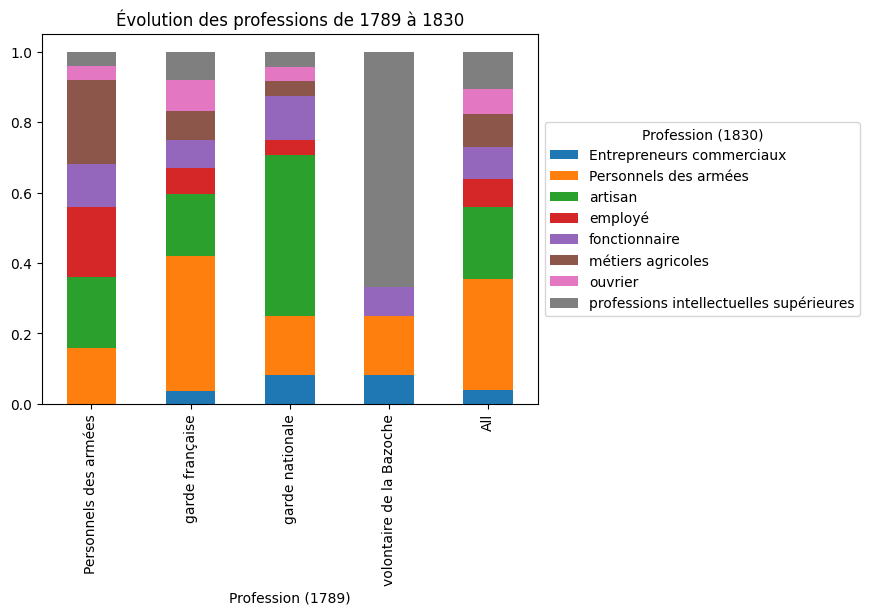

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
profils_lignes = pd.crosstab(data['Profession (1789)'], data['Profession (1830)'], normalize="index", margins=True)
plt.figure(figsize=(10, 5))
profils_lignes.plot.bar(stacked=True, title="Évolution des professions de 1789 à 1830")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Profession (1830)")
plt.show()

Interprétation : les profils lignes sont différents entre eux (ex le profil"Seul" et le profil "Seul avec enfants") et ils sont différents du profil moyen des lignes ("All"). Cela veut dire que la distribution du lieu où ont dormi les personnes la nuit précédante n'est pas la même selon la situation familiale. On peut penser que les deux variables sont liées.

#### Construisez les profils colonnes :

In [ ]:
profils_colonnes = pd.crosstab(df['Situation_familiale'], df['Dormi_nuitderniere'], normalize="columns",margins=True)
profils_colonnes

Dormi_nuitderniere,Hébergement familial,Hébergé par un tiers,Non réponse,Par 115,Sans toit,All
Situation_familiale,,,,,,
Couple,0.067073,0.121622,0.0,0.043956,0.044280,0.059801
Couple avec enfants,0.024390,0.000000,0.0,0.516484,0.044280,0.104651
Non réponse,0.018293,0.027027,0.5,0.000000,0.003690,0.011628
Seul,0.335366,0.770270,0.5,0.307692,0.881919,0.631229
Seul avec enfant,0.554878,0.081081,0.0,0.131868,0.025830,0.192691


<Figure size 640x480 with 0 Axes>

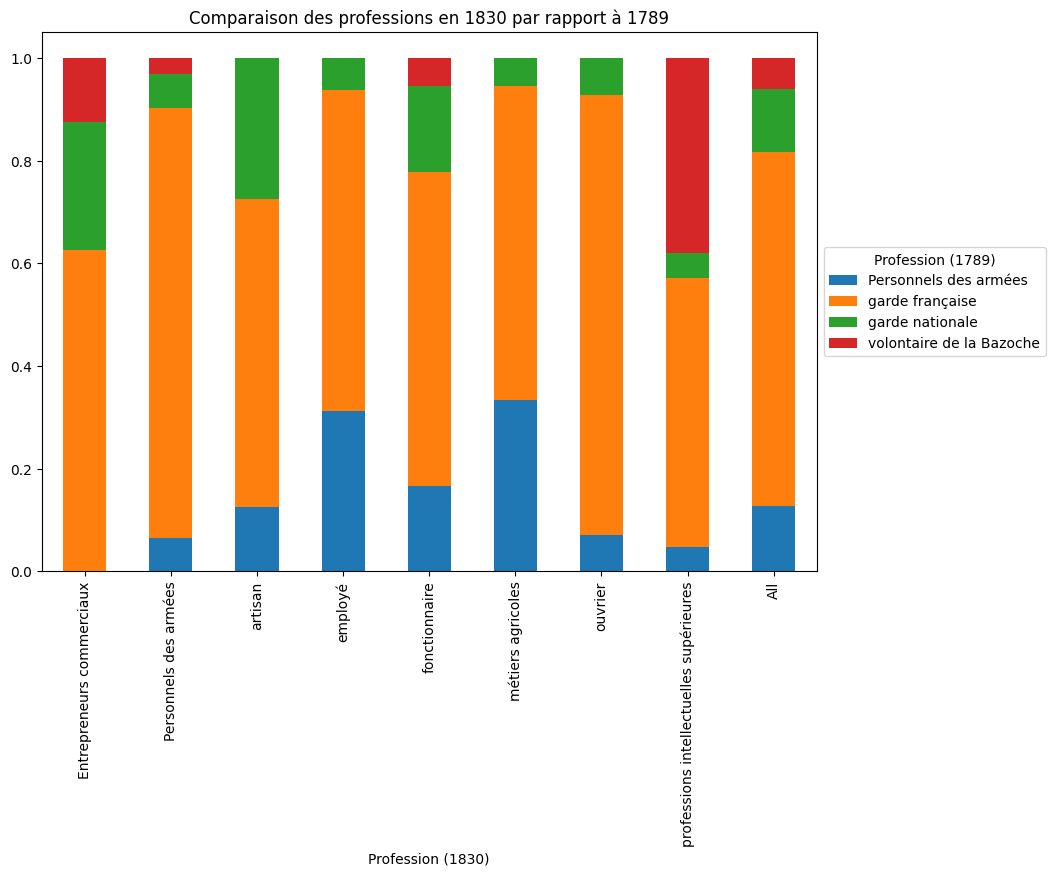

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

profils_colonnes = pd.crosstab(data['Profession (1830)'], data['Profession (1789)'], normalize="index", margins=True)

plt.figure()
profils_colonnes.plot.bar(stacked=True, figsize=(10, 7), title="Comparaison des professions en 1830 par rapport à 1789")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Profession (1789)")
plt.show()

### Combien va-t-il y avoir de valeurs propres dans l'AFC ?

In [ ]:
nb_vp=np.min([n-1,p-1])
print("Nombre max de valeurs propres = ",nb_vp)

Nombre max de valeurs propres =  4


### AFC avec la bibliothèque *fAnalysis*
Réalisez l'AFC puis interrpétez les principaux tableaux et graphiques de l’AFC tout en soignant la rédaction des interprétations.

In [ ]:
ca = fCA(row_labels=contingence.index.values, col_labels=contingence.columns.values)

In [ ]:
ca.fit(contingence.to_numpy())

CA(col_labels=array(['Entrepreneurs commerciaux', 'Personnels des armées', 'artisan',
       'employé', 'fonctionnaire', 'métiers agricoles', 'ouvrier',
       'professions intellectuelles supérieures'], dtype=object),
   row_labels=array(['Personnels des armées', 'garde française', 'garde nationale',
       'volontaire de la Bazoche'], dtype=object))

L'exécution de la méthode ca.fit comporte le calcul des attributs :
- ca.eig\_ : valeurs propres
- ca.row\_coord\_ : coordonnées des points lignes
- ca.col\_coord\_ : coordonnées des points colonnes

### Inertie et valeurs propres
L'attribut ca.eig_ contient :
- en 1ère ligne : les valeurs propres en valeur absolue
- en 2ème ligne : les valeurs propres en pourcentage de la variance totale
- en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [ ]:
print(ca.eig_)

[[2.35850694e-01 7.61547446e-02 6.56629576e-02]
 [6.24491476e+01 2.01644472e+01 1.73864052e+01]
 [6.24491476e+01 8.26135948e+01 1.00000000e+02]]


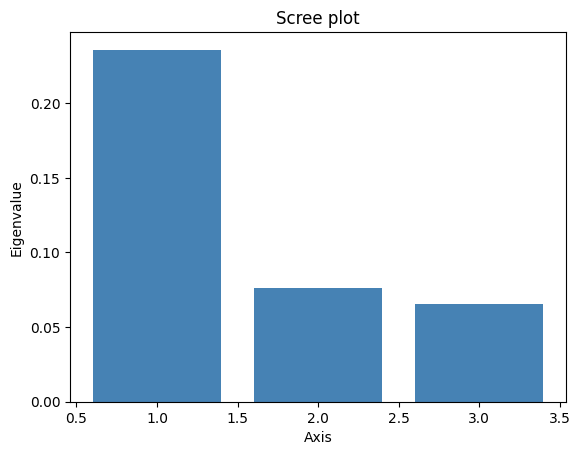

In [ ]:
ca.plot_eigenvalues() #Graphique des valeurs propres en valeur absolue
#ca.plot_eigenvalues(type="percentage") #Graphique des valeurs propres en % d'inertie

Appliquons la règle  de  Kaiser pour déterminer le nombre d'axe à retenir en ne retenant que les axes dont la valeur propre est plus grande que la valeur propre moyenne.

In [ ]:
vp_mean=np.mean(ca.eig_[0])
print(vp_mean)

0.1258894655532464


Interprétation : deux axes permettent de reconstituer 89% de l'inertie du nuage de départ et ils vont permettre d'expliquer le lien entre les deux variables.

### Extraction et analyse des résultats pour les profils lignes

In [ ]:
# Cosinus² des profils lignes
print(ca.row_cos2_)
# Contributions des profils lignes
print(ca.row_contrib_)

[[0.23174477 0.54621322 0.222042  ]
 [0.10217151 0.01432176 0.88350673]
 [0.08733559 0.50830466 0.40435975]
 [0.98490891 0.00324604 0.01184505]]
[[ 7.43634039 54.28148457 25.59181971]
 [ 0.9529351   0.41368545 29.59784646]
 [ 2.46297511 44.39489883 40.95938494]
 [89.1477494   0.90993115  3.85094889]]


**Remarque** :

Cette façon de présenter les réusltats pour les lignes est peu lisible. Construisons un date frame dans lequel on concatène les coordonnées, contributions et cosinus² pour les 2 premiers axes.

In [ ]:
resCA_rows=pd.DataFrame({
                    "Profil" : ca.row_labels,
                    "Coord1" : ca.row_coord_[:,0],
                    "Contrib1" : ca.row_contrib_[:,0],
                    "Cos1" : ca.row_cos2_[:,0],
                    "Coord2" : ca.row_coord_[:,1],
                    "Contrib2" : ca.row_contrib_[:,1],
                    "Cos2" : ca.row_cos2_[:,1],
})
resCA_rows.head(5)

,Profil,Coord1,Contrib1,Cos1,Coord2,Contrib2,Cos2
0,Personnels des armées,-0.371759,7.436340,0.231745,0.570739,54.281485,0.546213
1,garde française,-0.057058,0.952935,0.102172,-0.021362,0.413685,0.014322
2,garde nationale,-0.218362,2.462975,0.087336,-0.526796,44.394899,0.508305
3,volontaire de la Bazoche,1.857874,89.147749,0.984909,0.106658,0.909931,0.003246


La même chose en graphiques pour l'axe 1 :

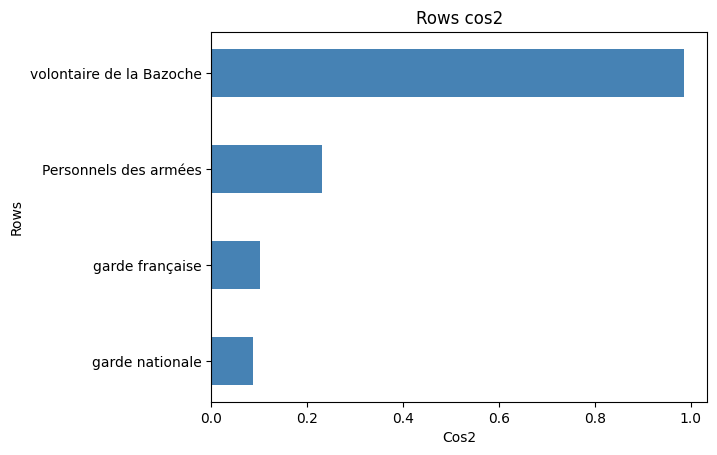

In [ ]:
ca.plot_row_cos2(num_axis=1)

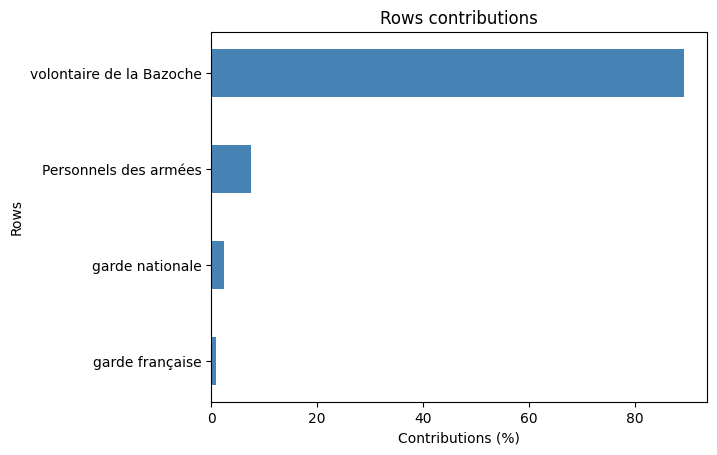

In [ ]:
ca.plot_row_contrib(num_axis=1)

La même chose en graphiques pour l'axe 2 :

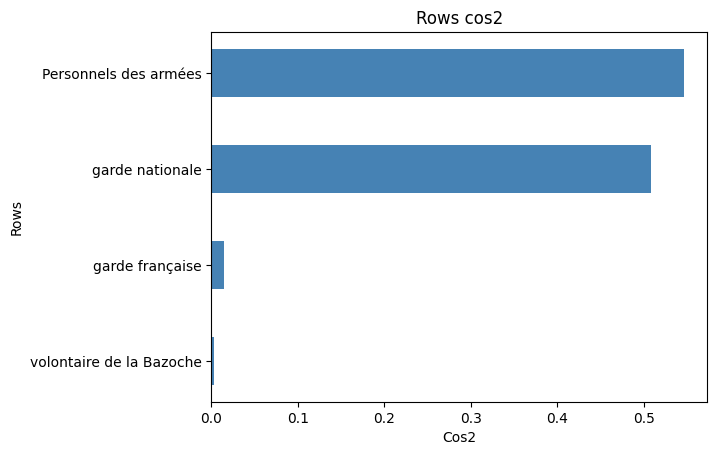

In [ ]:
ca.plot_row_cos2(num_axis=2)

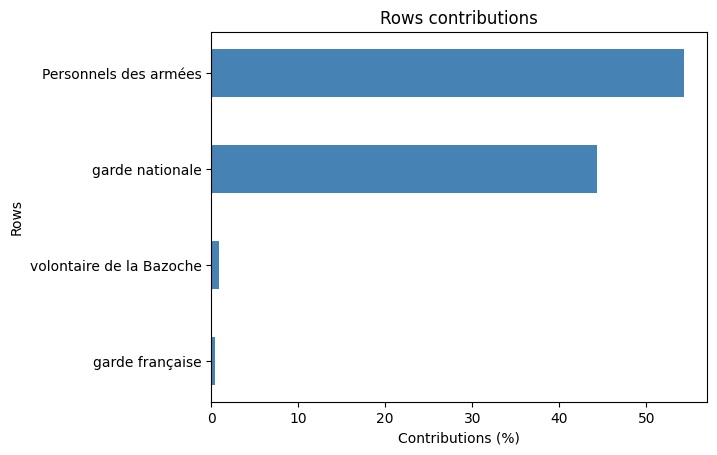

In [ ]:
ca.plot_row_contrib(num_axis=2)

**Projection des profils lignes sur le 1er plan factoriel**

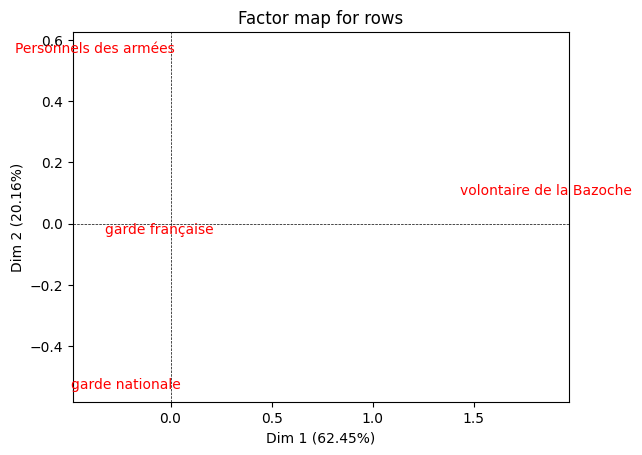

In [ ]:
ca.mapping_row(num_x_axis=1, num_y_axis=2)

### Extraction et analyse des résultats pour les profils colonnes

In [ ]:
# Cosinus² des profils colonnes
print(ca.col_cos2_)
# Contributions des profils colonnes
print(ca.col_contrib_)

[[2.54870378e-01 6.79327008e-01 6.58026145e-02]
 [2.78201050e-02 1.72777302e-02 9.54902165e-01]
 [3.16565140e-01 3.68931804e-01 3.14503057e-01]
 [3.16009491e-01 6.23454088e-01 6.05364207e-02]
 [9.90834544e-02 1.29000422e-05 9.00903646e-01]
 [2.80328709e-01 6.50292971e-01 6.93783196e-02]
 [2.40285781e-01 2.06586830e-02 7.39055536e-01]
 [9.85548178e-01 7.18898536e-03 7.26283667e-03]]
[[1.47170639e+00 1.21484505e+01 1.36477696e+00]
 [3.82342929e-01 7.35395858e-01 4.71378636e+01]
 [7.23169481e+00 2.61013692e+01 2.58058751e+01]
 [3.99841269e+00 2.44304891e+01 2.75119231e+00]
 [1.47900437e-01 5.96347831e-05 4.83018075e+00]
 [4.79860018e+00 3.44743623e+01 4.26567226e+00]
 [1.05931186e+00 2.82058108e-01 1.17027939e+01]
 [8.09100307e+01 1.82781526e+00 2.14164510e+00]]


In [ ]:
resCA_cols=pd.DataFrame({
                    "Profil" : ca.col_labels,
                    "Coord1" : ca.col_coord_[:,0],
                    "Contrib1" : ca.col_contrib_[:,0],
                    "Cos1" : ca.col_cos2_[:,0],
                    "Coord2" : ca.col_coord_[:,1],
                    "Contrib2" : ca.col_contrib_[:,1],
                    "Cos2" : ca.col_cos2_[:,1],
})
resCA_cols.head(5)

,Profil,Coord1,Contrib1,Cos1,Coord2,Contrib2,Cos2
0,Entrepreneurs commerciaux,0.292360,1.471706,0.254870,-0.477306,12.148451,0.679327
1,Personnels des armées,-0.053528,0.382343,0.027820,-0.042184,0.735396,0.017278
2,artisan,-0.289829,7.231695,0.316565,-0.312884,26.101369,0.368932
3,employé,-0.340750,3.998413,0.316009,0.478617,24.430489,0.623454
4,fonctionnaire,-0.061787,0.147900,0.099083,0.000705,0.000060,0.000013


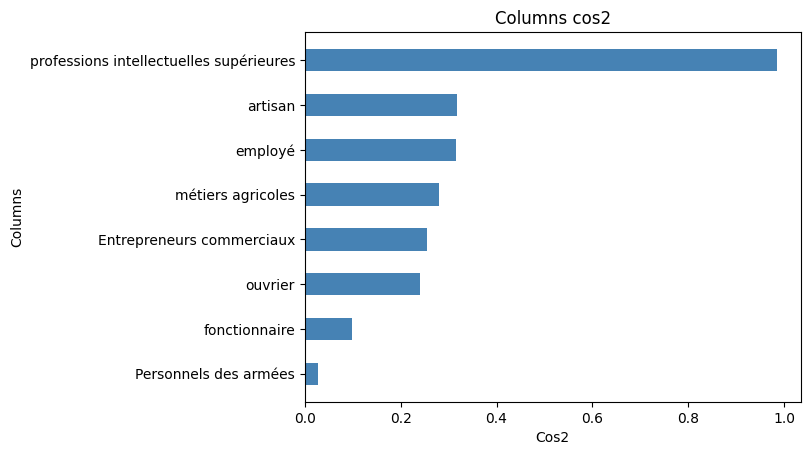

In [ ]:
ca.plot_col_cos2(num_axis=1)

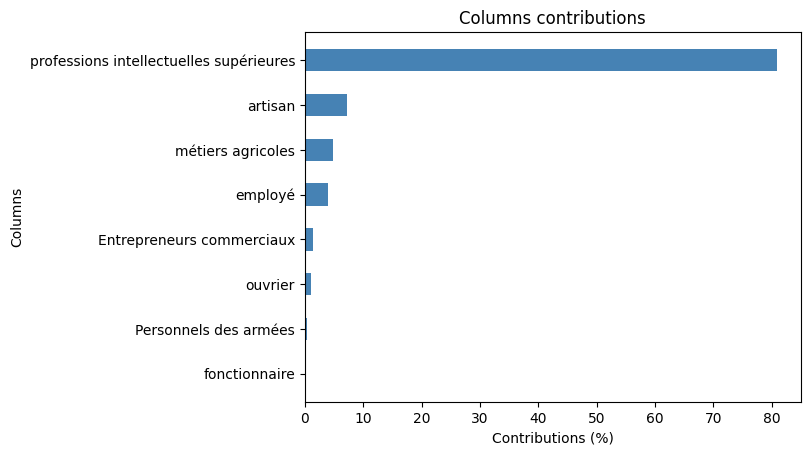

In [ ]:
ca.plot_col_contrib(num_axis=1)

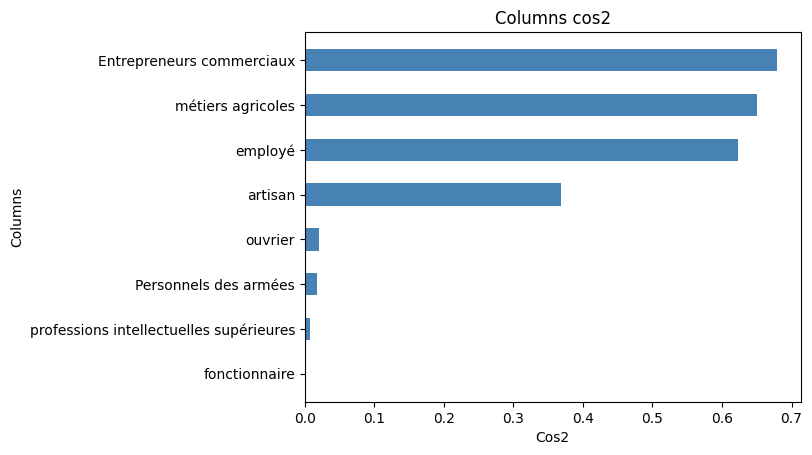

In [ ]:
ca.plot_col_cos2(num_axis=2)

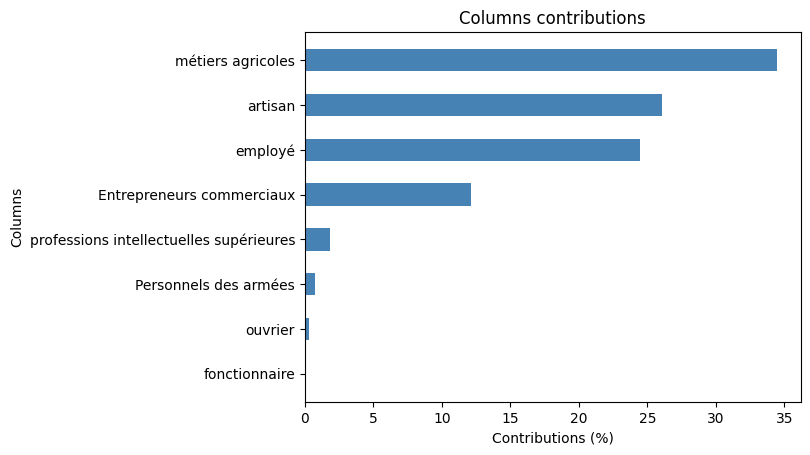

In [ ]:
ca.plot_col_contrib(num_axis=2)

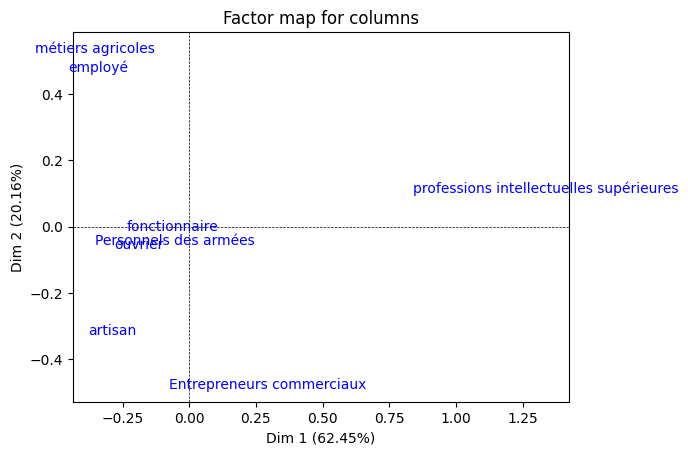

In [ ]:
ca.mapping_col(num_x_axis=1, num_y_axis=2)

#### Graphique simultané des profils lignes et colonnes

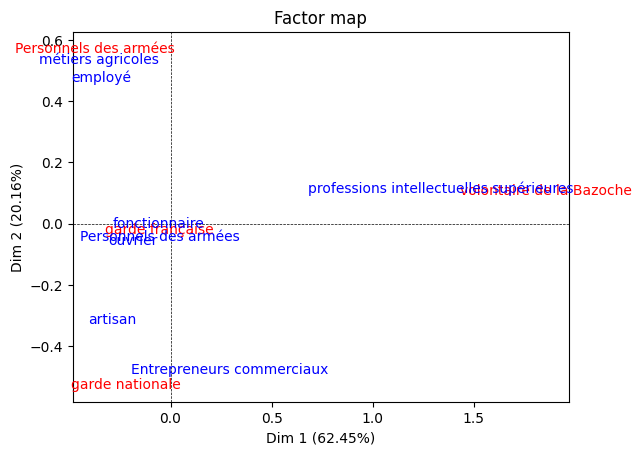

In [ ]:
# Graphique simultané des profils lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
ca.mapping(num_x_axis=1, num_y_axis=2)

